# Statistical Inference and Machine Learning - HW01
## EPFL - MGT-448
## Lecturer:  Kiyavash Negar 

In [73]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import warnings
np.seterr(divide='ignore', invalid='ignore')
warnings.filterwarnings('ignore')

### Load data

In [74]:
train_data = pd.read_csv("./data/training.csv", header=None)
test_data = pd.read_csv("./data/testing.csv", header=None)
train_class, train_feature = train_data.loc[:, :0], train_data.loc[:, 1:]
test_class, test_feature = test_data.loc[:, :0], test_data.loc[:, 1:]

### **Task 1.4** 
Logistic Regression - Netwon method

In [75]:
LR_model = LogisticRegression(
    penalty='none',
    solver='newton-cg',
    multi_class='multinomial',
    max_iter=10000
)
LR_model.fit(train_feature, train_class.to_numpy().ravel())

LogisticRegression(max_iter=10000, multi_class='multinomial', penalty='none',
                   solver='newton-cg')

In [76]:
newton_accuracy_train = accuracy_score(train_class, LR_model.predict(train_feature))
newton_loss_train = log_loss(train_class, LR_model.predict_proba(train_feature))
newton_accuracy_test = accuracy_score(test_class, LR_model.predict(test_feature))
newton_loss_test = log_loss(test_class, LR_model.predict_proba(test_feature))
print("Newtom method \nAccuracy train: {:.3f} test: {:.3f}\nLogLoss train: {:.3f} test: {:.3f}".format(newton_accuracy_train, newton_accuracy_test, newton_loss_train, newton_loss_test))

Newtom method 
Accuracy train: 1.000 test: 0.825
LogLoss train: 0.000 test: 3.084


In [77]:
max_iters = LR_model.n_iter_[0]
newton_error = []
for i in range(max_iters):
    LR_model = LogisticRegression(
        penalty='none',
        solver='newton-cg',
        multi_class='multinomial',
        max_iter=i+1
    )
    LR_model.fit(train_feature, train_class.to_numpy().ravel())
    newton_error.append(log_loss(train_class, LR_model.predict_proba(train_feature)))

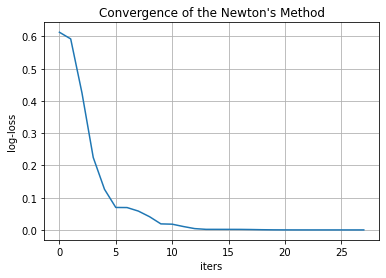

In [78]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(range(len(newton_error)), newton_error)

ax.set(xlabel='iters', ylabel='log-loss', title="Convergence of the Newton's Method")
ax.grid()

fig.savefig("Newton-Loss.png", dpi=300)

### **Task 1.5**
Logistic Regression - Stochastic Gradient Descent

In [79]:
LR_model = LogisticRegression(
    penalty='none',
    solver='sag',
    multi_class='multinomial',
    max_iter=10000
)
LR_model.fit(train_feature, train_class.to_numpy().ravel())

LogisticRegression(max_iter=10000, multi_class='multinomial', penalty='none',
                   solver='sag')

In [80]:
sgd_accuracy_train = accuracy_score(train_class, LR_model.predict(train_feature))
sgd_loss_train = log_loss(train_class, LR_model.predict_proba(train_feature))
sgd_accuracy_test = accuracy_score(test_class, LR_model.predict(test_feature))
sgd_loss_test = log_loss(test_class, LR_model.predict_proba(test_feature))
print("Stocastic Gradient Descent \nAccuracy train: {:.3f} test: {:.3f}\nLogLoss train: {:.3f} test: {:.3f}".format(sgd_accuracy_train, sgd_accuracy_test, sgd_loss_train, sgd_loss_test))

Stocastic Gradient Descent 
Accuracy train: 1.000 test: 0.831
LogLoss train: 0.005 test: 1.086


In [81]:
max_iters = LR_model.n_iter_[0]
sgd_error = []
for i in range(0, max_iters, 10):
    LR_model = LogisticRegression(
        penalty='none',
        solver='sag',
        multi_class='multinomial',
        max_iter=i+1
    )
    LR_model.fit(train_feature, train_class.to_numpy().ravel())
    sgd_error.append(log_loss(train_class, LR_model.predict_proba(train_feature)))

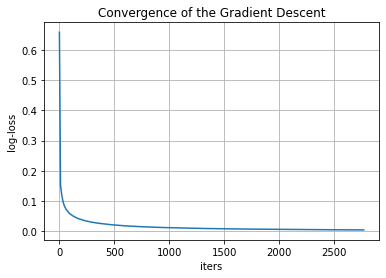

In [82]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(range(0, max_iters, 10), sgd_error)

ax.set(xlabel='iters', ylabel='log-loss', title='Convergence of the Gradient Descent')
ax.grid()

fig.savefig("gd-Loss.png", dpi=300)

### **Task 1.7**
Logistic Regression - Stocastic Gradient Descent  
Batch sizes: 1, 16, 32

#### Batch size = 1 

In [83]:
sgd = SGDClassifier(loss="log")
batch_size = 1
iters = 200
error_1 = []
for n in range(iters):
    for i in range(0, train_feature.shape[0], batch_size):
        X_minibatch = train_feature[i:i+batch_size]
        y_minibatch = train_class[i:i+batch_size]
        sgd.partial_fit(X_minibatch, y_minibatch.to_numpy().ravel(), classes=np.unique(train_class))
    error_1.append(log_loss(train_class, np.nan_to_num(sgd.predict_proba(train_feature), nan = 0.25)))

In [84]:
sgd_accuracy_train = accuracy_score(train_class, sgd.predict(train_feature))
sgd_error_train = log_loss(train_class, np.nan_to_num(sgd.predict_proba(train_feature), nan = 0.25))
sgd_accuracy_test = accuracy_score(test_class, sgd.predict(test_feature))
sgd_error_test = log_loss(test_class, np.nan_to_num(sgd.predict_proba(test_feature), nan = 0.25))
print("Stocastic Gradient Descent - Batch size 1 \nAccuracy train: {:.3f} test: {:.3f}\nLogLoss train: {:.3f} test: {:.3f}".format(sgd_accuracy_train, sgd_accuracy_test, sgd_loss_train, sgd_loss_test))

Stocastic Gradient Descent - Batch size 1 
Accuracy train: 0.990 test: 0.828
LogLoss train: 0.005 test: 1.086


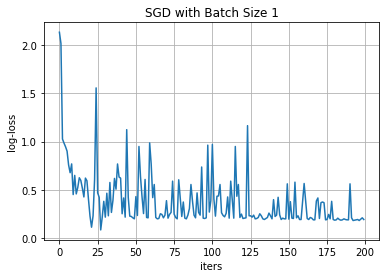

In [85]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(range(iters), error_1)

ax.set(xlabel='iters', ylabel='log-loss', title='SGD with Batch Size 1')
ax.grid()
# fig.savefig("gd-Loss.png", dpi=300)

#### Batch size = 16 

In [86]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log")
batch_size = 16
iters = 200
error_16 = []
for n in range(iters):
    for i in range(0, train_feature.shape[0], batch_size):
        X_minibatch = train_feature[i:i+batch_size]
        y_minibatch = train_class[i:i+batch_size]
        sgd.partial_fit(X_minibatch, y_minibatch.to_numpy().ravel(), classes=np.unique(train_class))
    error_16.append(log_loss(train_class, np.nan_to_num(sgd.predict_proba(train_feature), nan = 0.25)))

In [87]:
sgd_accuracy_train = accuracy_score(train_class, sgd.predict(train_feature))
sgd_error_train = log_loss(train_class, np.nan_to_num(sgd.predict_proba(train_feature), nan = 0.25))
sgd_accuracy_test = accuracy_score(test_class, sgd.predict(test_feature))
sgd_error_test = log_loss(test_class, np.nan_to_num(sgd.predict_proba(test_feature), nan = 0.25))
print("Stocastic Gradient Descent - Batch size 16 \nAccuracy train: {:.3f} test: {:.3f}\nLogLoss train: {:.3f} test: {:.3f}".format(sgd_accuracy_train, sgd_accuracy_test, sgd_loss_train, sgd_loss_test))

Stocastic Gradient Descent - Batch size 16 
Accuracy train: 0.995 test: 0.837
LogLoss train: 0.005 test: 1.086


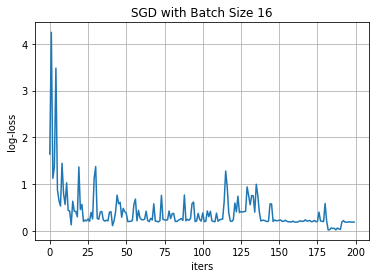

In [88]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(range(iters), error_16)

ax.set(xlabel='iters', ylabel='log-loss', title='SGD with Batch Size 16')
ax.grid()

# fig.savefig("gd-Loss.png", dpi=300)

#### Batch size = 32 

In [89]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log")
batch_size = 32
iters = 200
error_32 = []
for n in range(iters):
    for i in range(0, train_feature.shape[0], batch_size):
        X_minibatch = train_feature[i:i+batch_size]
        y_minibatch = train_class[i:i+batch_size]
        sgd.partial_fit(X_minibatch, y_minibatch.to_numpy().ravel(), classes=np.unique(train_class))
    error_32.append(log_loss(train_class, np.nan_to_num(sgd.predict_proba(train_feature), nan = 0.25)))

In [90]:
sgd_accuracy_train = accuracy_score(train_class, sgd.predict(train_feature))
sgd_error_train = log_loss(train_class, np.nan_to_num(sgd.predict_proba(train_feature), nan = 0.25))
sgd_accuracy_test = accuracy_score(test_class, sgd.predict(test_feature))
sgd_error_test = log_loss(test_class, np.nan_to_num(sgd.predict_proba(test_feature), nan = 0.25))
print("Stocastic Gradient Descent - Batch size 32 \nAccuracy train: {:.3f} test: {:.3f}\nLogLoss train: {:.3f} test: {:.3f}".format(sgd_accuracy_train, sgd_accuracy_test, sgd_loss_train, sgd_loss_test))

Stocastic Gradient Descent - Batch size 32 
Accuracy train: 0.995 test: 0.846
LogLoss train: 0.005 test: 1.086


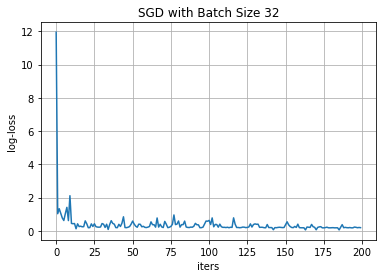

In [91]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(range(iters), error_32)

ax.set(xlabel='iters', ylabel='log-loss', title='SGD with Batch Size 32')
ax.grid()

# fig.savefig("gd-Loss.png", dpi=300)

#### Plot together

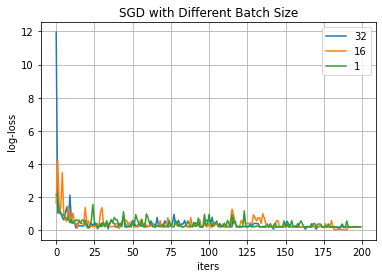

In [92]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(range(iters), error_32, label='32')
ax.plot(range(iters), error_16, label='16')
ax.plot(range(iters), error_1, label='1')

ax.set(xlabel='iters', ylabel='log-loss', title='SGD with Different Batch Size')
ax.grid()
ax.legend()

fig.savefig("sgd-Loss.png", dpi=300)